
Расстояния между точками:

Между точками A и B:
Евклидово расстояние: 4.69
Манхэттенское расстояние: 8.00
Расстояние Чебышева: 3.00
Квадрат евклидова расстояния: 22.00

Между точками A и C:
Евклидово расстояние: 3.61
Манхэттенское расстояние: 5.00
Расстояние Чебышева: 3.00
Квадрат евклидова расстояния: 13.00

Между точками A и D:
Евклидово расстояние: 4.58
Манхэттенское расстояние: 7.00
Расстояние Чебышева: 4.00
Квадрат евклидова расстояния: 21.00

Между точками B и C:
Евклидово расстояние: 5.92
Манхэттенское расстояние: 9.00
Расстояние Чебышева: 5.00
Квадрат евклидова расстояния: 35.00

Между точками B и D:
Евклидово расстояние: 7.68
Манхэттенское расстояние: 11.00
Расстояние Чебышева: 7.00
Квадрат евклидова расстояния: 59.00

Между точками C и D:
Евклидово расстояние: 6.93
Манхэттенское расстояние: 12.00
Расстояние Чебышева: 4.00
Квадрат евклидова расстояния: 48.00


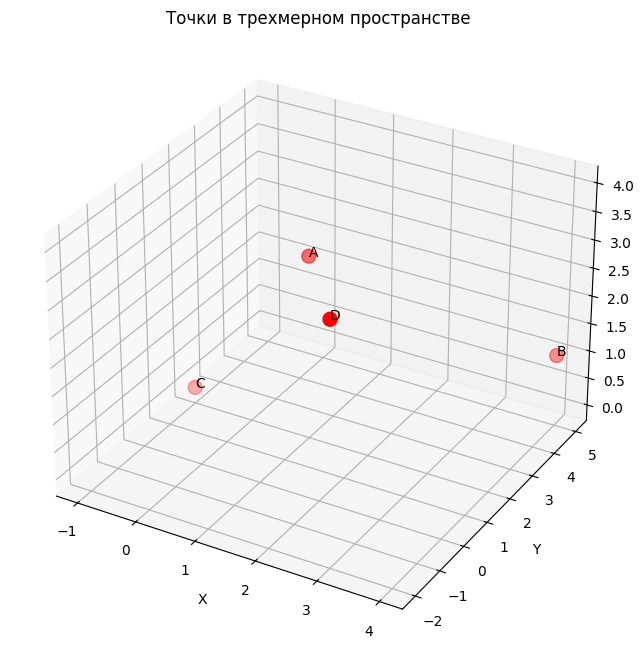

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import euclidean, cityblock, chebyshev

points = np.array([
    [1, 2, 3],
    [4, 5, 1],
    [-1, 2, 0],
    [3, -2, 4]
])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='r', marker='o', s=100)

labels = ['A', 'B', 'C', 'D']
for i, label in enumerate(labels):
    ax.text(points[i, 0], points[i, 1], points[i, 2], label)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Точки в трехмерном пространстве')

print("\nРасстояния между точками:")
for i in range(len(points)):
    for j in range(i+1, len(points)):
        p1, p2 = points[i], points[j]
        print(f"\nМежду точками {labels[i]} и {labels[j]}:")
        print(f"Евклидово расстояние: {euclidean(p1, p2):.2f}")
        print(f"Манхэттенское расстояние: {cityblock(p1, p2):.2f}")
        print(f"Расстояние Чебышева: {chebyshev(p1, p2):.2f}")
        print(f"Квадрат евклидова расстояния: {euclidean(p1, p2)**2:.2f}")

plt.show()

# евклидово: d=*корень* (x2-x1)^2+(y2-y1)^2
# манхеттенское:d = |x2-x1| + |y2-y1|
# чебышевское: d = max(|x2-x1|, |y2-y1|)

k=1, test_size=0.2: accuracy = 1.000
k=5, test_size=0.2: accuracy = 1.000
k=10, test_size=0.2: accuracy = 1.000
k=1, test_size=0.15: accuracy = 1.000
k=5, test_size=0.15: accuracy = 1.000
k=10, test_size=0.15: accuracy = 1.000


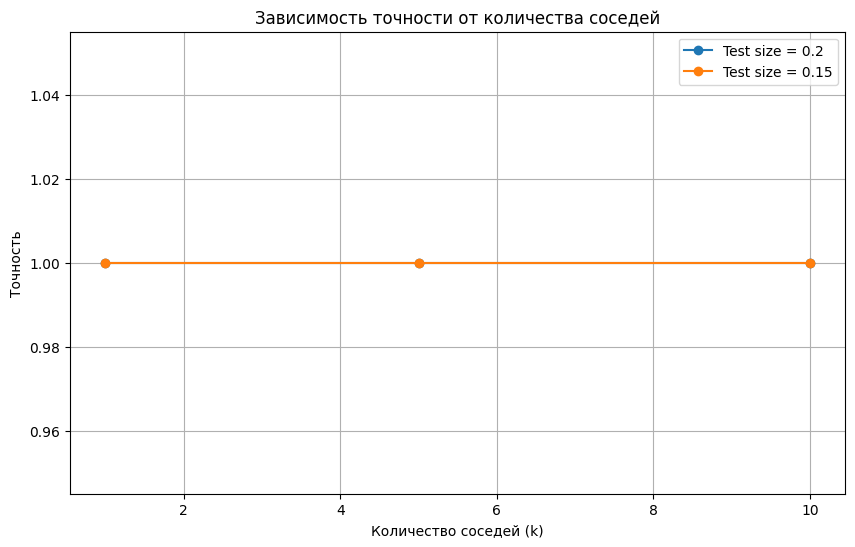

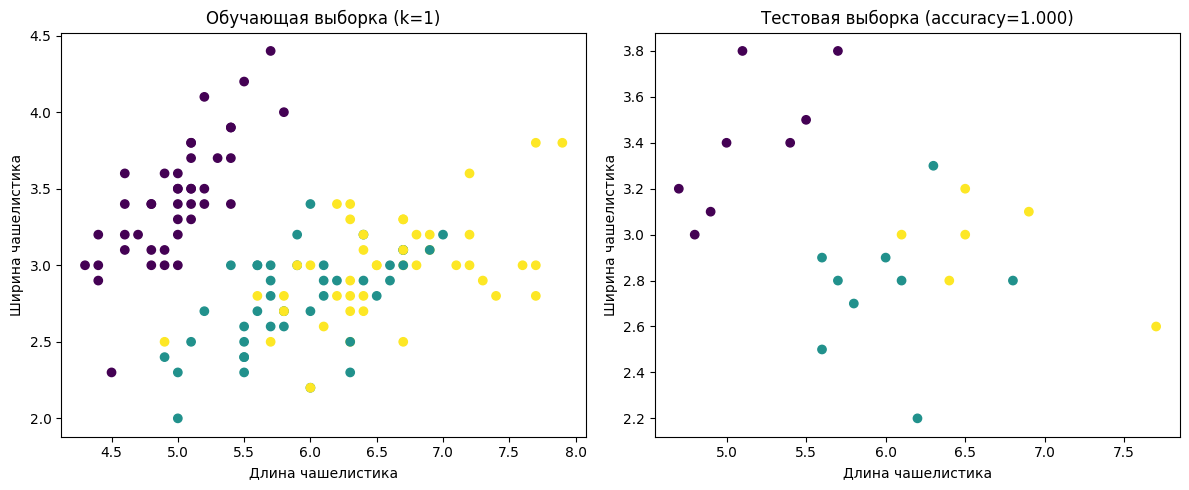

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Загружаем датасет
iris = load_iris()
X = iris.data
y = iris.target

# Функция для обучения модели и оценки точности
def train_and_evaluate(k, test_size):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, X_train, X_test, y_train, y_test, clf

# Эксперименты с разными k
k_values = [1, 5, 10]
test_sizes = [0.2, 0.15]

results = {}
for test_size in test_sizes:
    results[test_size] = []
    for k in k_values:
        accuracy, *_ = train_and_evaluate(k, test_size)
        results[test_size].append(accuracy)
        print(f"k={k}, test_size={test_size}: accuracy = {accuracy:.3f}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
for test_size in test_sizes:
    plt.plot(k_values, results[test_size],
             marker='o', label=f'Test size = {test_size}')

plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность')
plt.title('Зависимость точности от количества соседей')
plt.legend()
plt.grid(True)

# Визуализация границ решений для лучшего k
# Используем только первые два признака для визуализации
k_best = k_values[np.argmax([results[0.15][i] for i in range(len(k_values))])] #самое точное k
accuracy, X_train, X_test, y_train, y_test, clf = train_and_evaluate(k_best, 0.15)

plt.figure(figsize=(12, 5))

# График обучающей выборки
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.title(f'Обучающая выборка (k={k_best})')
plt.xlabel('Длина чашелистика')
plt.ylabel('Ширина чашелистика')

# График тестовой выборки
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.title(f'Тестовая выборка (accuracy={accuracy:.3f})')
plt.xlabel('Длина чашелистика')
plt.ylabel('Ширина чашелистика')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction import DictVectorizer
import pandas as pd

# Определяем набор признаков для нескольких людей
people_features = [
    {
        'цвет_глаз': 'карие',
        'рост': 'высокий',
        'цвет_волос': 'темные',
        'возраст_группа': 'молодой',
        'пол': 'мужской'
    },
    {
        'цвет_глаз': 'голубые',
        'рост': 'средний',
        'цвет_волос': 'светлые',
        'возраст_группа': 'средний',
        'пол': 'женский'
    },
    {
        'цвет_глаз': 'зеленые',
        'рост': 'низкий',
        'цвет_волос': 'рыжие',
        'возраст_группа': 'пожилой',
        'пол': 'женский'
    }
]

# Создаем векторизатор
vectorizer = DictVectorizer(sparse=False)

# Преобразуем признаки в матрицу
feature_matrix = vectorizer.fit_transform(people_features)

# Получаем имена признаков
feature_names = vectorizer.get_feature_names_out()

# Создаем DataFrame для удобного отображения
df = pd.DataFrame(feature_matrix, columns=feature_names)

print("Имена признаков:")
print(feature_names)
print("\nМатрица признаков:")
print(df)

print("\nРазмерность матрицы:", feature_matrix.shape)
print("\nКоличество уникальных значений для каждого признака:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")


Имена признаков:
['возраст_группа=молодой' 'возраст_группа=пожилой'
 'возраст_группа=средний' 'пол=женский' 'пол=мужской' 'рост=высокий'
 'рост=низкий' 'рост=средний' 'цвет_волос=рыжие' 'цвет_волос=светлые'
 'цвет_волос=темные' 'цвет_глаз=голубые' 'цвет_глаз=зеленые'
 'цвет_глаз=карие']

Матрица признаков:
   возраст_группа=молодой  возраст_группа=пожилой  возраст_группа=средний  \
0                     1.0                     0.0                     0.0   
1                     0.0                     0.0                     1.0   
2                     0.0                     1.0                     0.0   

   пол=женский  пол=мужской  рост=высокий  рост=низкий  рост=средний  \
0          0.0          1.0           1.0          0.0           0.0   
1          1.0          0.0           0.0          0.0           1.0   
2          1.0          0.0           0.0          1.0           0.0   

   цвет_волос=рыжие  цвет_волос=светлые  цвет_волос=темные  цвет_глаз=голубые  \
0            

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Загрузка данных о потреблении бензина
url_petrol = "https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv"
petrol_data = pd.read_csv(url_petrol)

# Вывод информации о данных
print("Размер датасета:", petrol_data.shape)
print("\nПервые несколько строк данных:")
print(petrol_data.head())
print("\nОписательная статистика:")
print(petrol_data.describe())

# Разделение на признаки и целевую переменную
X = petrol_data.drop('Petrol_Consumption', axis=1)
y = petrol_data['Petrol_Consumption']

print("\nПризнаки для обучения:", list(X.columns))

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nРазмеры выборок:")
print(f"Тренировочная выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

# Создание и обучение модели
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=5)  # Добавим ограничение глубины дерева
tree_reg.fit(X_train, y_train)

# Делаем прогноз
y_pred = tree_reg.predict(X_test)

# Оценка точности модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nСтатистика модели:")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")

# Сравнение предсказаний с реальными значениями
comparison_df = pd.DataFrame({
    'Реальное потребление': y_test.iloc[:5],
    'Предсказанное потребление': y_pred[:5],
    'Абсолютная ошибка': abs(y_test.iloc[:5] - y_pred[:5])
})
print("\nСравнение предсказаний с реальными значениями:")
print(comparison_df)

# Оценка важности признаков
feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Важность': tree_reg.feature_importances_
})
feature_importance = feature_importance.sort_values('Важность', ascending=False)
print("\nВажность признаков:")
print(feature_importance)

# Вычисление R-squared (коэффициента детерминации)
r2_score = tree_reg.score(X_test, y_test)
print(f"\nR-squared score: {r2_score:.4f}")

Размер датасета: (48, 5)

Первые несколько строк данных:
   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  

Описательная статистика:
       Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000

In [3]:
def qZ(x, y):
    return (x + 3 * y -3 ) / (3 * x ** 2 + y ** 2 + 1)

def qSum(Z):
    return sum(Z)

def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[3]]
    X[0] = oldX[sortedId[1]]
    X[1] = oldX[sortedId[0]]

    Y[2] = oldY[sortedId[2]]
    Y[3] = oldY[sortedId[3]]
    Y[0] = oldY[sortedId[1]]
    Y[1] = oldY[sortedId[0]]

    return X, Y

def sorting(Z):
    sortedId = sorted(range(len(Z)), key=lambda k: Z[k])

    return sortedId

def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))

    X = X[:]
    Y = Y[:]
    Z = Z[:]
    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    return X, Y, Z

def evoSteps(X, Y, stepsNum=4):
    for i in range(4):
        arrZ = [qZ(x, Y[i]) for x, y in enumerate(X)]
        X, Y = exchangeScheme(X, Y, sorting(Z))
        total_quality = qSum(Z)
        print("Суммарное качество:", total_quality)
        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, Z

X = [-5, -3, -2, 0]
Y = [-1, -2, 0, 1]
results = evoSteps(X, Y)
for i in range (len(results(2))):
  qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}')

NameError: name 'Z' is not defined

Начальная длина маршрута: 145
Цикл 1:
Длина маршрута: 159
Температура: 50.0

Цикл 2:
Длина маршрута: 158
Температура: 25.0

Цикл 3:
Длина маршрута: 138
Температура: 12.5

Цикл 4:
Длина маршрута: 130
Температура: 6.25

Финальная длина маршрута: 130


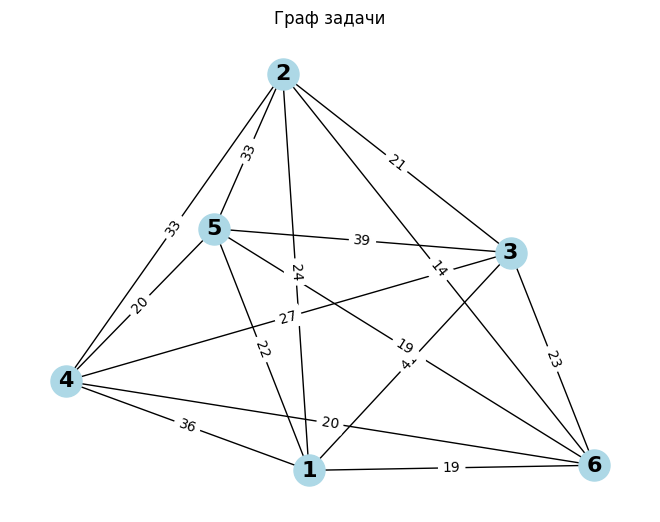

In [2]:
    import numpy as np
    import networkx as nx
    import matplotlib.pyplot as plt

    # Начальные данные
    edges = {
        (1,2): 24, (1,3): 41, (1,4): 36, (1,5): 22, (1,6): 19,
        (2,3): 21, (2,4): 33, (2,5): 33, (2,6): 14,
        (3,4): 27, (3,5): 39, (3,6): 23,
        (4,5): 20, (4,6): 20,
        (5,6): 19
    }

    # Начальный маршрут
    V = [1, 3, 4, 5, 6, 2, 1]
    # Последовательность замен
    Z = [(3,4), (4,6), (5,2), (6,2)]
    # Вероятности
    P = [33, 82, 51, 76]
    # Начальная температура
    T1 = 100

    def get_edge_length(i, j):
        """Получение длины ребра между вершинами"""
        if i > j:
            i, j = j, i
        return edges[(i,j)]

    def calculate_path_length(path):
        """Вычисление длины маршрута"""
        length = 0
        for i in range(len(path)-1):
            length += get_edge_length(path[i], path[i+1])
        return length

    def swap_vertices(path, v1, v2):
        """Перестановка вершин в маршруте"""
        new_path = path.copy()
        idx1 = new_path.index(v1)
        idx2 = new_path.index(v2)
        new_path[idx1], new_path[idx2] = new_path[idx2], new_path[idx1]
        return new_path

    def simulated_annealing_step(path, swap, p, temp):
        """Один шаг алгоритма имитации отжига"""
        current_length = calculate_path_length(path)
        new_path = swap_vertices(path, swap[0], swap[1])
        new_length = calculate_path_length(new_path)
        delta = new_length - current_length

        if delta <= 0:
            return new_path, new_length

        if p <= 100 * np.exp(-delta/temp):
            return new_path, new_length

        return path, current_length

    # Выполняем 4 цикла алгоритма
    current_path = V
    current_temp = T1
    path_lengths = []

    print("Начальная длина маршрута:", calculate_path_length(current_path))

    for i in range(4):
        current_path, length = simulated_annealing_step(
            current_path,
            Z[i],
            P[i],
            current_temp
        )
        path_lengths.append(length)
        current_temp *= 0.5
        print(f"Цикл {i+1}:")
        print(f"Длина маршрута: {length}")
        print(f"Температура: {current_temp}\n")

    print("Финальная длина маршрута:", path_lengths[-1])

    # Создаем и визуализируем граф
    G = nx.Graph()
    for (i,j), weight in edges.items():
        G.add_edge(i, j, weight=weight)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=500, font_size=16, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Граф задачи")
    plt.show()